## Initial commit - Linear model

Applying a linear model as a baseline to build on. 

In [1]:
from fastkaggle import *

In [2]:
comp = 'playground-series-s5e8'

path = setup_comp(comp)

100%|███████████████████████████████████████████████████████████████████████████████| 14.7M/14.7M [00:00<00:00, 520MB/s]

In [4]:
import numpy as np, pandas as pd, os
for dirname, _, filenames in os.walk('./playground-series-s5e8'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./playground-series-s5e8/test.csv
./playground-series-s5e8/train.csv
./playground-series-s5e8/sample_submission.csv


## Looking at the data

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(f'{path}/train.csv')
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [4]:
df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values (at least no NaNs).

## Continuous variables

In [5]:
df.describe(include=(np.number))

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [6]:
df.y.unique()

array([0, 1])

```id``` is a unique value for each row/sample, so don't have to take that into consideration. ```y``` is the dependent variable.

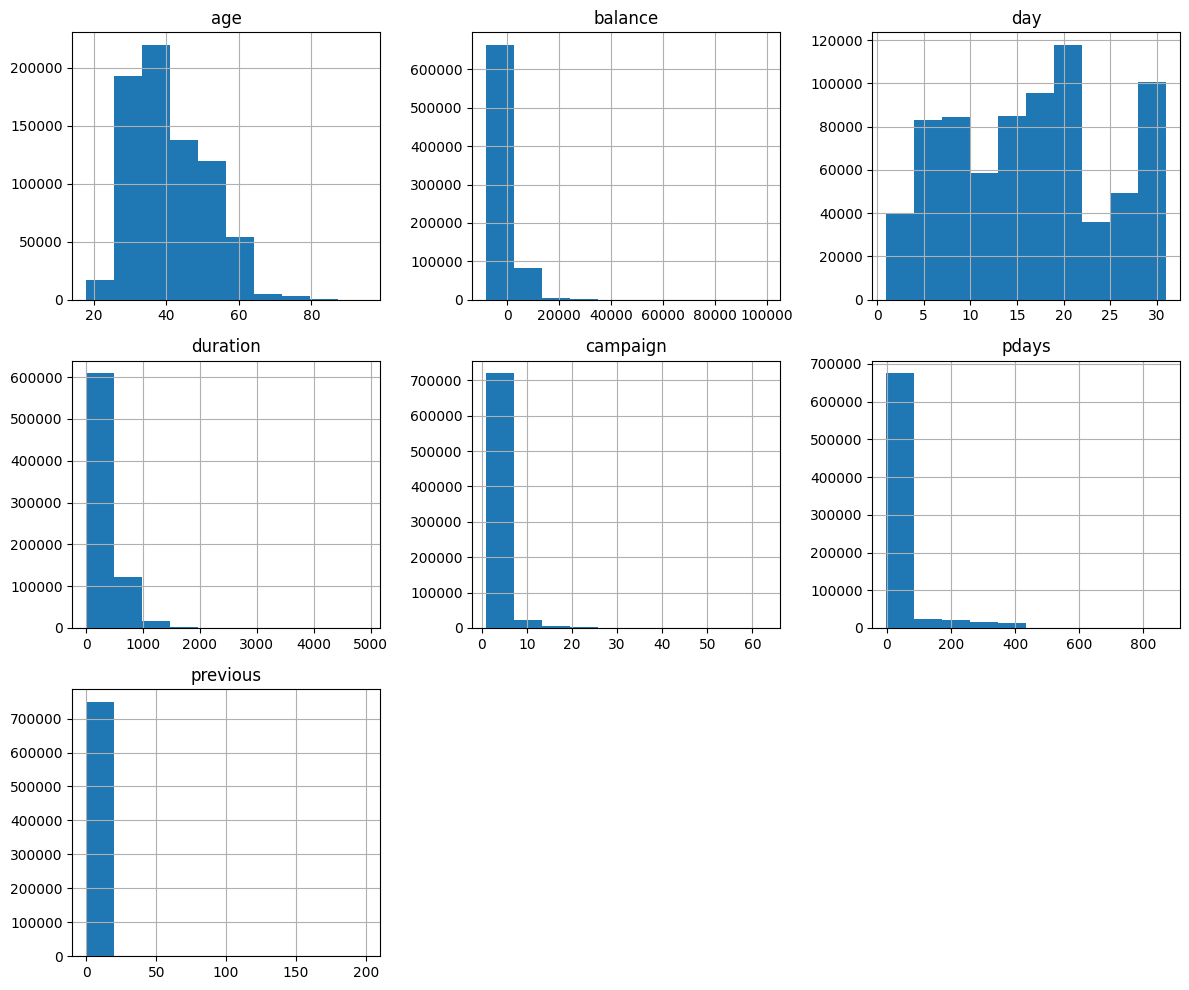

In [7]:
df_to_plot = df.select_dtypes(include='number').drop(columns=['id', 'y'])

df_to_plot.hist(figsize=(12,10));
plt.tight_layout()
plt.show()

```balance```, ```duration```, ```campaign```, ```pdays``` and ```previous``` are all long-tailed distributions. Will apply log transformation to these variables.

<Axes: >

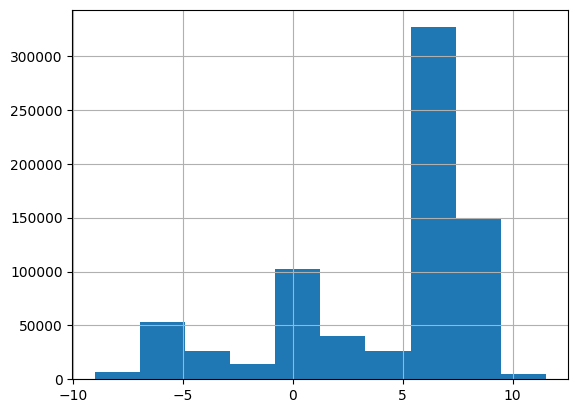

In [8]:
df_to_plot['balance'] = np.sign(df_to_plot['balance']) * np.log1p(np.abs(df_to_plot['balance']))
df_to_plot['balance'].hist()

<Axes: >

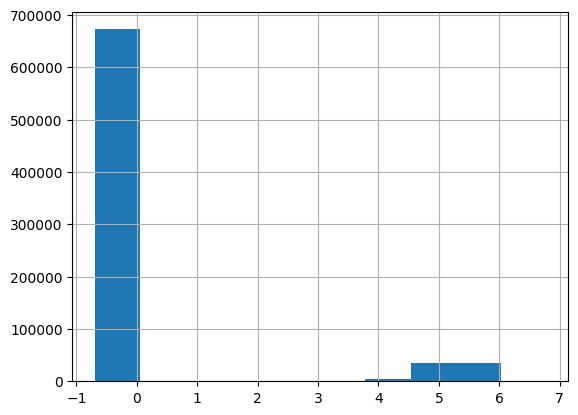

In [9]:
df_to_plot['pdays'] = np.sign(df_to_plot['pdays']) * np.log1p(np.abs(df_to_plot['pdays']))
df_to_plot['pdays'].hist()

In [10]:
for colname in ['duration', 'campaign', 'previous']:
    df_to_plot[colname] = np.log1p(df_to_plot[colname])

df_to_plot.head()

,age,balance,day,duration,campaign,pdays,previous
0,42,2.079442,25,4.770685,1.386294,-0.693147,0.0
1,38,6.244167,18,5.225747,0.693147,-0.693147,0.0
2,36,6.401917,14,4.718499,1.098612,-0.693147,0.0
3,27,3.555348,28,2.397895,1.098612,-0.693147,0.0
4,26,6.791221,3,6.805723,0.693147,-0.693147,0.0


In [11]:
df_to_plot.describe()

,age,balance,day,duration,campaign,pdays,previous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,4.177661,16.117209,5.064997,1.127229,-0.075419,0.123168
std,10.098829,4.493638,8.250832,1.031530,0.483716,1.829238,0.399328
min,18.000000,-8.989694,1.000000,0.693147,0.693147,-0.693147,0.000000
25%,33.000000,0.000000,9.000000,4.521789,0.693147,-0.693147,0.000000
50%,39.000000,6.453625,17.000000,4.897840,1.098612,-0.693147,0.000000
75%,48.000000,7.237778,21.000000,5.891644,1.386294,-0.693147,0.000000
max,95.000000,11.510101,31.000000,8.500861,4.158883,6.770789,5.303305


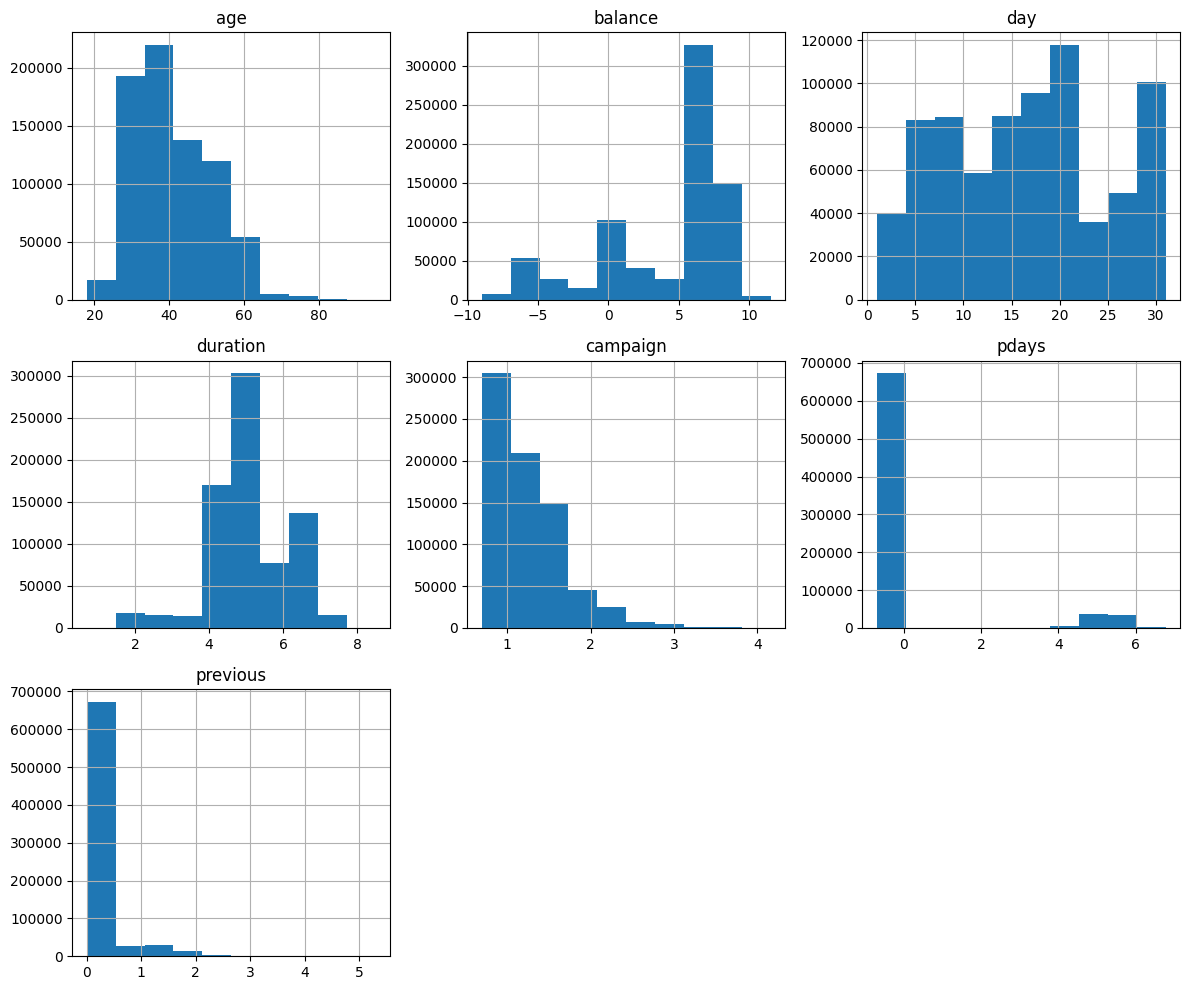

In [12]:
df_to_plot.hist(figsize=(12,10));
plt.tight_layout()
plt.show()

Distributions look a better. ```previous```, ```pdays``` and ```campaign``` still look long tailed though. 

Going to add the transformed variable columns to the original dataframe:

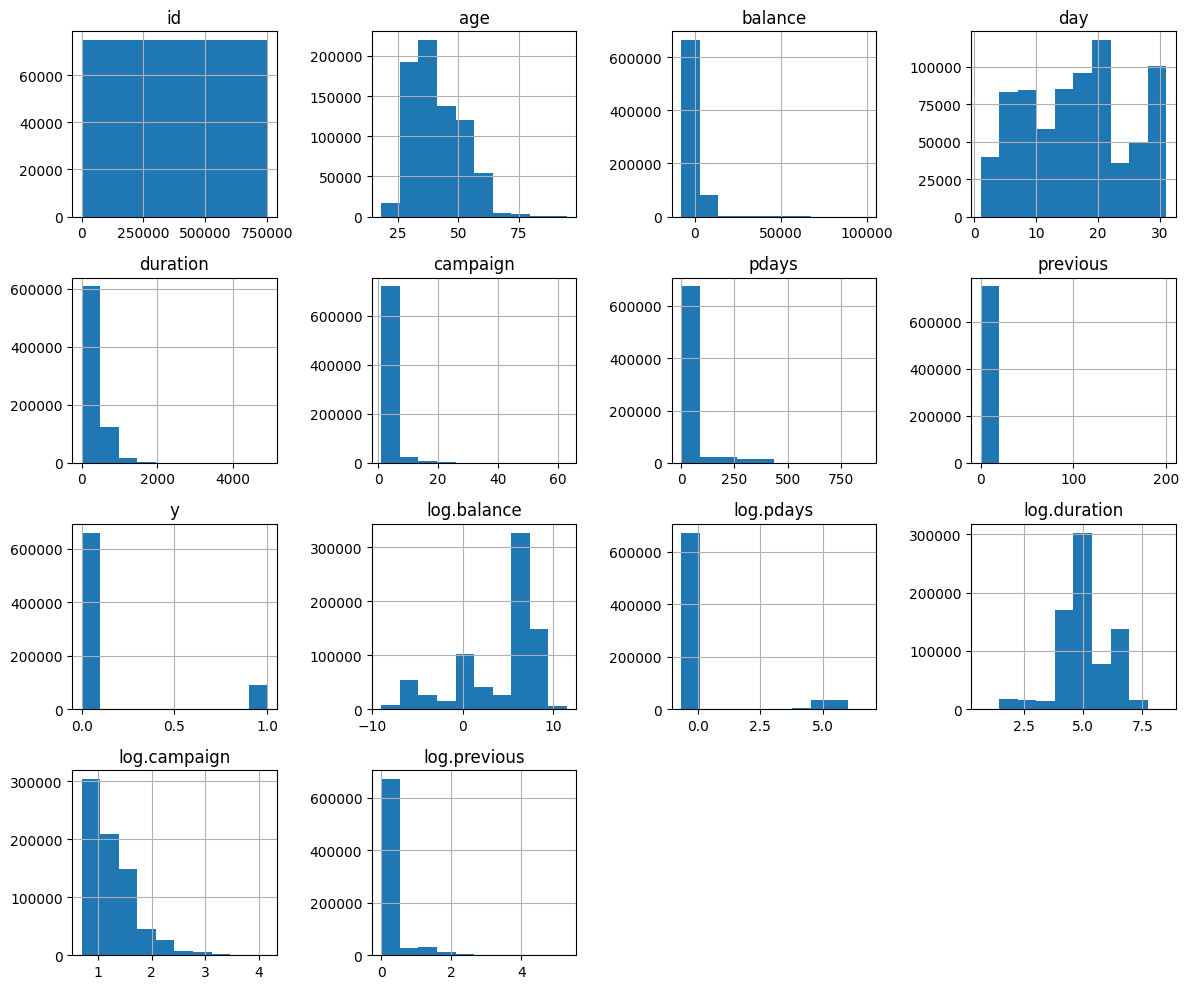

In [13]:
df['log.balance'] = np.sign(df['balance']) * np.log1p(np.abs(df['balance']))
df['log.pdays'] = np.sign(df['pdays']) * np.log1p(np.abs(df['pdays']))

for colname in ['duration', 'campaign', 'previous']:
    df[f'log.{colname}'] = np.log1p(df[colname])

df.hist(figsize=(12,10));
plt.tight_layout()
plt.show()

## Categorical variables

In [14]:
df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,750000,750000,750000,750000,750000,750000,750000,750000,750000
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,175541,480759,401683,737151,411288,645023,486655,228411,672450


Looks like some of the categorical columns contain a category called 'unknown'. Specifically, the ```contact``` and ```poutcome``` columns contain this value.

In [15]:
print(df['poutcome'].unique())
print(df['contact'].unique())

['unknown' 'other' 'failure' 'success']
['cellular' 'unknown' 'telephone']


Let's make dummy variables for these columns:

In [16]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
df.columns

Index(['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'log.balance', 'log.pdays', 'log.duration',
       'log.campaign', 'log.previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object

In [17]:
added_cols = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
              'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 
              'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary',
              'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 
              'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
              'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 
              'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
df[added_cols].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [18]:
indep_cols = ['age', 'day', 'log.balance', 'log.pdays', 'log.duration', 'log.campaign', 'log.previous'] + added_cols

df[indep_cols] = df[indep_cols].astype(float)
df.head()

,id,age,balance,day,duration,campaign,pdays,previous,y,log.balance,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,42.0,7,25.0,117,3,-1,0,0,2.079442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,38.0,514,18.0,185,1,-1,0,0,6.244167,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,36.0,602,14.0,111,2,-1,0,0,6.401917,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,27.0,34,28.0,10,2,-1,0,0,3.555348,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,26.0,889,3.0,902,1,-1,0,1,6.791221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now, we have our predictor variables prepared. Converting them into PyTorch tensors now:

In [19]:
import torch
from torch import tensor

t_dep = tensor(df.y)
t_dep

tensor([0, 0, 0,  ..., 0, 0, 0])

In [20]:
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep[:5]

tensor([[42.0000, 25.0000,  2.0794, -0.6931,  4.7707,  1.3863,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000],
        [38.0000, 18.0000,  6.2442, -0.6931,  5.2257,  0.6931,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 

Noticed here that ```age``` and ```day``` values are significantly larger than the others. Requires some normalization: divide all values by the maximum of their respective columns so all variables are in the same range:

In [21]:
vals,indices = t_indep.max(axis=0)
t_indep = t_indep/vals
t_indep[:5]

tensor([[ 0.4421,  0.8065,  0.1807, -0.1024,  0.5612,  0.3333,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000],
        [ 0.4000,  0.5806,  0.5425, -0.1024,  0.6147,  0.1667,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 

This looks better -- all the values are in the same range.

In [22]:
print(t_indep.shape)
print(t_dep.shape)

torch.Size([750000, 51])
torch.Size([750000])


## Set up the linear model

Initialize the coefficients:

In [23]:
n_coeffs = t_indep.shape[1]
coeffs = torch.rand(n_coeffs)-0.5
coeffs

tensor([-0.0632, -0.3418, -0.0804,  0.4263, -0.0714,  0.4875,  0.2222, -0.1356,
         0.1539, -0.1130,  0.3872,  0.4888,  0.3987, -0.2294,  0.2511, -0.1612,
        -0.4703, -0.4803, -0.0257, -0.3464, -0.4420,  0.1535,  0.2670, -0.2511,
         0.1075, -0.1975,  0.0960, -0.1806,  0.2681,  0.3231,  0.3130, -0.4513,
         0.1557, -0.0590, -0.1533,  0.3615,  0.0842,  0.3928, -0.4278, -0.4163,
         0.2589, -0.2240,  0.1916,  0.4230,  0.4617,  0.1050, -0.2288, -0.3404,
         0.4678, -0.3953, -0.4404])

It's a binary classification, so we pass predictions through a sigmoid function to get all outputs in the [0,1] range.

In [24]:
preds = torch.sigmoid(t_indep@coeffs)
preds[:10]

tensor([0.2837, 0.2782, 0.4612, 0.5040, 0.2207, 0.5859, 0.4607, 0.5205, 0.5828,
        0.7272])

Mean absolute error is our loss function:

In [25]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.4885)

Now, let's make these into functions:

In [26]:
def calc_preds(indeps, coeffs):
    return torch.sigmoid(indeps@coeffs)

def calc_loss(indeps, deps, coeffs):
    return (torch.abs(calc_preds(indeps, coeffs)-deps)).mean()

## Setting up gradient descent step

In [27]:
coeffs.requires_grad_()

tensor([-0.0632, -0.3418, -0.0804,  0.4263, -0.0714,  0.4875,  0.2222, -0.1356,
         0.1539, -0.1130,  0.3872,  0.4888,  0.3987, -0.2294,  0.2511, -0.1612,
        -0.4703, -0.4803, -0.0257, -0.3464, -0.4420,  0.1535,  0.2670, -0.2511,
         0.1075, -0.1975,  0.0960, -0.1806,  0.2681,  0.3231,  0.3130, -0.4513,
         0.1557, -0.0590, -0.1533,  0.3615,  0.0842,  0.3928, -0.4278, -0.4163,
         0.2589, -0.2240,  0.1916,  0.4230,  0.4617,  0.1050, -0.2288, -0.3404,
         0.4678, -0.3953, -0.4404], requires_grad=True)

In [28]:
loss = calc_loss(t_indep, t_dep, coeffs)
loss

tensor(0.4885, grad_fn=<MeanBackward0>)

In [29]:
loss.backward()

In [30]:
coeffs.grad

tensor([ 7.3235e-02,  9.0491e-02,  5.1538e-02, -9.4734e-03,  9.3741e-02,
         4.7720e-02,  1.7964e-03,  1.8665e-02,  4.5584e-02,  4.4824e-03,
         4.1240e-03,  3.6079e-02,  5.5954e-03,  4.2399e-03,  1.6544e-02,
         1.1624e-03,  2.9859e-02,  3.1367e-03,  6.7360e-04,  1.7254e-02,
         1.1516e-01,  3.7734e-02,  2.5561e-02,  9.4317e-02,  4.5511e-02,
         4.7585e-03,  1.6682e-01,  3.3302e-03,  6.5632e-02,  1.0451e-01,
         1.4434e-01,  2.5804e-02,  9.9415e-02,  6.9011e-03,  6.3831e-02,
         6.4903e-03,  3.0299e-02, -1.0631e-05,  6.4381e-03,  3.9659e-03,
         2.7578e-02,  2.1293e-02, -2.3512e-04,  5.9120e-02,  1.5313e-02,
         6.3953e-05, -1.6922e-04,  9.1965e-03,  2.0124e-03, -2.7034e-03,
         1.6164e-01])

In [31]:
loss = calc_loss(t_indep, t_dep, coeffs)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.01)
    coeffs.grad.zero_()
    print(calc_loss(t_indep, t_dep, coeffs))

tensor(0.4851)


So, this is one gradient descent step; we need to do this over many epochs of training:

## Training the linear model

Going for a stratefied split since the classes are pretty imbalanced.

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(splitter.split(t_indep, t_dep))

In [33]:
trn_indep, val_indep = t_indep[train_idx], t_indep[val_idx]
trn_dep, val_dep = t_dep[train_idx], t_dep[val_idx]
print(len(trn_indep), len(val_indep))

600000 150000


Creating functions for: initializing coefficients, updating coefficients, and 1 gradient descent step.

In [34]:
def init_coeffs():
    return (torch.rand(n_coeffs)-0.5).requires_grad_()

In [35]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad*lr)
    coeffs.grad.zero_()

In [36]:
def one_epoch(coeffs, lr):
    loss = calc_loss(trn_indep, trn_dep, coeffs)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs,lr)
    print(f'{loss:.3f}', end='; ')

Now, create a function to train the model over many epochs:

In [37]:
def train_model(epochs=30, lr=0.01):
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs, lr=lr)
    return coeffs

Now let's try it. Should see the loss decreasing over the epochs.

In [38]:
coeffs = train_model(epochs=10, lr=0.1)

0.354; 0.341; 0.329; 0.318; 0.307; 0.297; 0.288; 0.280; 0.272; 0.264; 

In [39]:
def show_coeffs():
    return dict(zip(indep_cols, coeffs.requires_grad_(False)))

show_coeffs()

{'age': tensor(-0.0762),
 'day': tensor(0.2940),
 'log.balance': tensor(-0.2445),
 'log.pdays': tensor(0.2032),
 'log.duration': tensor(0.0983),
 'log.campaign': tensor(-0.3407),
 'log.previous': tensor(-0.3577),
 'job_admin.': tensor(-0.2500),
 'job_blue-collar': tensor(-0.2124),
 'job_entrepreneur': tensor(0.4680),
 'job_housemaid': tensor(-0.4329),
 'job_management': tensor(-0.2255),
 'job_retired': tensor(0.1643),
 'job_self-employed': tensor(-0.4834),
 'job_services': tensor(0.3113),
 'job_student': tensor(0.3908),
 'job_technician': tensor(0.3886),
 'job_unemployed': tensor(-0.4326),
 'job_unknown': tensor(0.2938),
 'marital_divorced': tensor(0.2252),
 'marital_married': tensor(-0.4710),
 'marital_single': tensor(-0.4167),
 'education_primary': tensor(-0.3751),
 'education_secondary': tensor(-0.3429),
 'education_tertiary': tensor(0.2679),
 'education_unknown': tensor(-0.1488),
 'default_no': tensor(0.0477),
 'default_yes': tensor(0.4464),
 'housing_no': tensor(-0.1802),
 'housin

## Measuring accuracy

Now, we measure the performance of this model on the validation set

In [40]:
preds = calc_preds(val_indep, coeffs)
preds[:10]

tensor([0.0581, 0.0952, 0.1315, 0.1229, 0.1671, 0.1091, 0.1538, 0.3212, 0.1677,
        0.3312])

We'll interpret that predictions below 0.5 indicate a False (0) prediction for the dependent variable.

In [41]:
results = val_dep.bool() == (preds>0.5)

In [42]:
results[:10]

tensor([ True,  True,  True,  True,  True,  True,  True,  True, False,  True])

In [43]:
results.float().mean()

tensor(0.8727)

Let's make this a function:

In [44]:
def acc(deps, preds):
    res = deps.bool() == (preds>0.5)
    return res.float().mean()

acc(val_dep,preds)

tensor(0.8727)

However, for this competition, the metric used is ROC AUC, so let's calculate that, too:

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_scr = roc_auc_score(val_dep, preds)
roc_auc_scr

0.627178611731114

Let's make ROC AUC calculation a function, too:

In [46]:
def roc_auc(truth,preds):
    return roc_auc_score(truth,preds)

roc_auc(val_dep,preds)

0.627178611731114

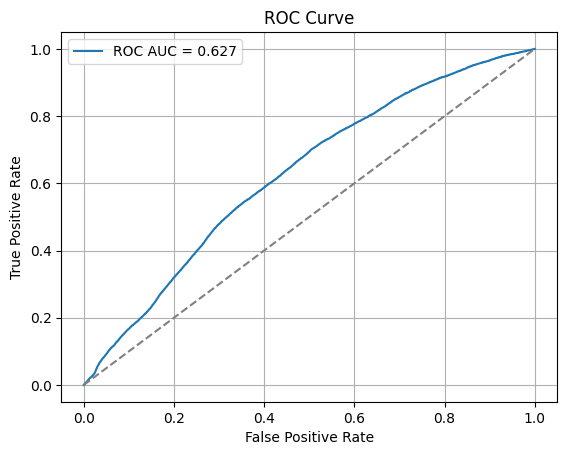

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(val_dep, preds)

plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_scr:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## Submitting to Kaggle

In [48]:
tst_df = pd.read_csv(f'{path}/test.csv')
tst_df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown


In [49]:
tst_df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [50]:
tst_df['log.balance'] = np.sign(tst_df['balance']) * np.log1p(np.abs(tst_df['balance']))
tst_df['log.pdays'] = np.sign(tst_df['pdays']) * np.log1p(np.abs(tst_df['pdays']))

for colname in ['duration', 'campaign', 'previous']:
    tst_df[f'log.{colname}'] = np.log1p(tst_df[colname])

In [51]:
tst_df = pd.get_dummies(tst_df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [52]:
tst_df[indep_cols] = tst_df[indep_cols].astype(float)

In [53]:
tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)

In [54]:
tst_df['y'] = calc_preds(tst_indep, coeffs)
tst_df['y']

0         0.449484
1         0.011232
2         0.077473
3         0.960616
4         0.787377
            ...   
249995    0.766474
249996    0.835817
249997    0.003017
249998    0.671604
249999    0.068916
Name: y, Length: 250000, dtype: float32

In [55]:
sub_df = tst_df[['id','y']]
sub_df

,id,y
0,750000,0.449484
1,750001,0.011232
2,750002,0.077473
3,750003,0.960616
4,750004,0.787377
...,...,...
249995,999995,0.766474
249996,999996,0.835817
249997,999997,0.003017
249998,999998,0.671604


In [56]:
sub_df.to_csv('sub0.csv', index=False)

In [57]:
!head sub0.csv

id,y
750000,0.44948378
750001,0.011232495
750002,0.07747302
750003,0.9606164
750004,0.7873774
750005,0.45212457
750006,0.9745127
750007,0.010753551
750008,0.033379637
